In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [107]:
from scipy.stats import skew,kurtosis

In [108]:
df=pd.read_csv('ODI_Match_info.csv')
match_data=pd.read_csv('ODI_Match_Data.csv')

/var/folders/_b/351zml7j389f_w4hhkmyqzk00000gn/T/ipykernel_17800/185423759.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [109]:
df.shape

(2379, 18)

In [110]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [111]:
df.duplicated().count()

2379

In [112]:
df.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [115]:
df['date']=pd.to_datetime(df['date'])
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023-09-23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023-09-21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [116]:
df.describe()

,id,date,dl_applied,win_by_runs,win_by_wickets
count,2.379000e+03,2379,2379.000000,2379.000000,2379.000000
mean,7.114354e+05,2013-09-22 06:47:21.866330368,0.084489,34.680538,2.750736
min,6.481400e+04,2002-12-29 00:00:00,0.000000,0.000000,0.000000
25%,3.353495e+05,2008-06-29 00:00:00,0.000000,0.000000,0.000000
50%,6.490950e+05,2013-11-10 00:00:00,0.000000,0.000000,0.000000
75%,1.144488e+06,2018-10-08 00:00:00,0.000000,58.000000,6.000000
max,1.395701e+06,2023-09-24 00:00:00,1.000000,317.000000,10.000000
std,4.287345e+05,NaN,0.278179,53.989592,3.238695


In [117]:
df['team1'].value_counts()

team1
Australia                   254
India                       252
England                     225
Sri Lanka                   192
Bangladesh                  191
New Zealand                 182
South Africa                172
West Indies                 172
Zimbabwe                    144
Pakistan                    139
Ireland                      83
Afghanistan                  66
Scotland                     50
United Arab Emirates         47
Netherlands                  26
Kenya                        25
Canada                       24
Namibia                      23
Papua New Guinea             23
Oman                         22
United States of America     22
Nepal                        21
Hong Kong                    10
Bermuda                       7
Africa XI                     5
Jersey                        2
Name: count, dtype: int64

In [118]:
print(df.win_by_runs.mean())
print(df["win_by_runs"].median())
print(df["win_by_runs"].value_counts())
print(skew(df["win_by_runs"]))
print(kurtosis(df["win_by_runs"]))

34.68053804119378
0.0
win_by_runs
0      1266
5        21
21       17
26       16
1        15
       ... 
275       1
151       1
184       1
170       1
209       1
Name: count, Length: 217, dtype: int64
1.7513439614683697
2.72922901748335


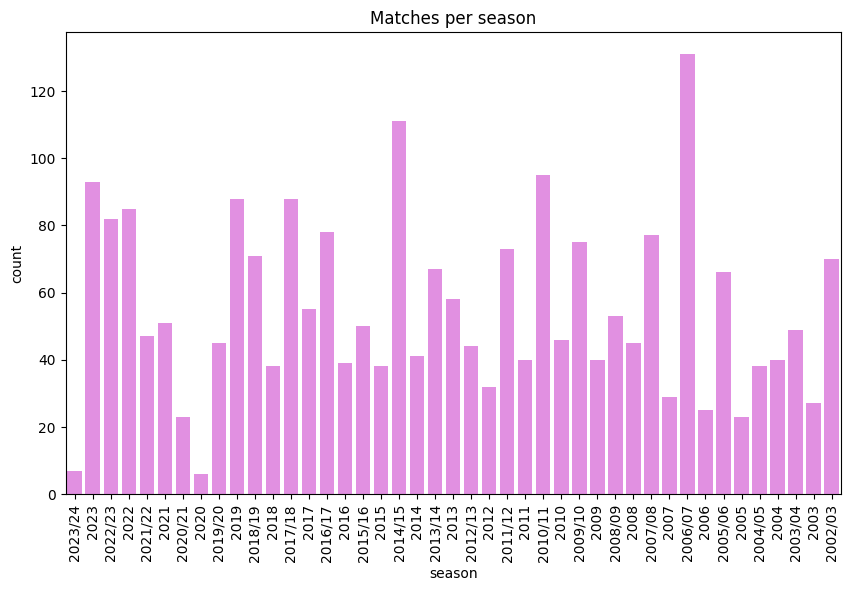

In [119]:
plt.figure(figsize=(10,6))

sns.countplot(x='season',data=df,color='violet')
plt.title('Matches per season')
plt.xticks(rotation=90)
plt.show()

In [120]:
px.histogram(df,x='season')


Calculation of win per team

In [121]:
team_win=df['winner'].value_counts()
team_win

winner
India                       290
Australia                   275
Sri Lanka                   214
South Africa                212
England                     209
Pakistan                    199
New Zealand                 184
West Indies                 136
Bangladesh                  128
Zimbabwe                     67
Afghanistan                  56
Ireland                      53
Scotland                     45
United Arab Emirates         34
Nepal                        28
Oman                         22
United States of America     22
Namibia                      21
Netherlands                  17
Kenya                        13
Papua New Guinea             11
Canada                       10
Hong Kong                     6
Asia XI                       3
Bermuda                       2
Jersey                        1
Africa XI                     1
Name: count, dtype: int64

In [122]:




fig=px.bar(x=team_win.index, y=team_win.values,color=team_win.index)
fig.update_layout(
    title="Matches"
)
fig.show()


In [123]:
top=df['player_of_match'].value_counts().head(10)

Text(0.5, 1.0, 'Man of the match')

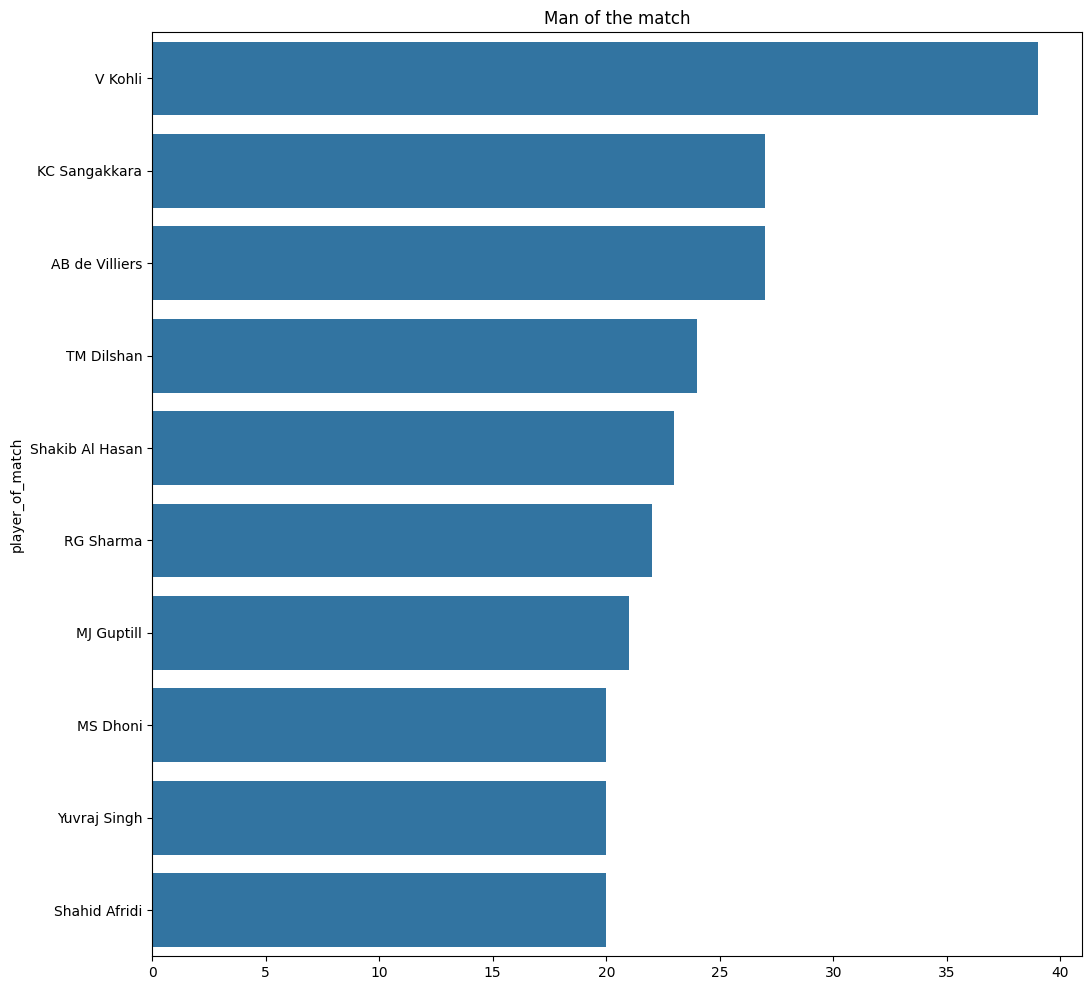

In [124]:
plt.figure(figsize=(12,12))
sns.barplot(x=top.values,y=top.index)
plt.title('Man of the match')

In [125]:
#toss decission
toss=df['toss_decision'].value_counts()

In [126]:
px.bar(x=toss.index,y=toss.values,color=toss.index)

In [127]:
batsman_total=match_data.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(15)
batsman_total

striker
V Kohli             13027
KC Sangakkara       11701
MS Dhoni            10310
RG Sharma            9961
AB de Villiers       9435
TM Dilshan           9212
LRPL Taylor          8198
DPMD Jayawardene     8154
Tamim Iqbal          7965
HM Amla              7875
MJ Guptill           7182
Mushfiqur Rahim      7149
EJG Morgan           7101
MJ Clarke            7063
RT Ponting           6979
Name: runs_off_bat, dtype: int64

In [128]:
px.bar(x=batsman_total.values,y=batsman_total.index,color=batsman_total.index)



In [129]:
top_bowlers_wickets = match_data[match_data['wicket_type'].notnull()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)

In [130]:

fig=px.bar(x=top_bowlers_wickets.index,y=top_bowlers_wickets.values,color=top_bowlers_wickets.index)
fig.update_layout(
    title="Most Wickets",  # Setting the title
    # Add other layout attributes as needed
)

In [131]:
top_10_batsmen = batsman_total.index.tolist()
top_10_bowlers = top_bowlers_wickets.index.tolist()

In [132]:
nationalities_batsmen = match_data[match_data['striker'].isin(top_10_batsmen)].groupby(['striker', 'batting_team'])['batting_team'].count().reset_index(name='count')
nationalities_bowlers = match_data[match_data['bowler'].isin(top_10_bowlers)].groupby(['bowler', 'bowling_team'])['bowling_team'].count().reset_index(name='count')
nationalities_batsmen

,striker,batting_team,count
0,AB de Villiers,Africa XI,100
1,AB de Villiers,South Africa,9388
2,DPMD Jayawardene,Asia XI,217
3,DPMD Jayawardene,Sri Lanka,10149
4,EJG Morgan,England,7537
5,EJG Morgan,Ireland,302
6,HM Amla,South Africa,9141
7,KC Sangakkara,Asia XI,94
8,KC Sangakkara,ICC World XI,62
9,KC Sangakkara,Sri Lanka,14594


In [133]:
px.bar(x=nationalities_bowlers['count'],y=nationalities_bowlers.bowler,color=nationalities_bowlers.bowling_team)

In [134]:
#todo: